In [78]:
#preprocessing

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [80]:
model = pd.read_csv('D:Disc Baru\\Machine Learning\\Datacamp\\KMeans\\oil_coning.csv')

In [81]:
model.head()

,Date,Gas Rate,Oil Rate,Water Rate
0,18-02-17,0,114,0
1,22-02-17,0,216,0
2,01-04-17,0,216,0
3,01-06-17,1717,259,316
4,26-06-17,1948,161,253


Gas rate is stated in MSCFD,
Oil rate is stated in BOPD,
Water rate is stated in BWPD

In [82]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
Date          9 non-null object
Gas Rate      9 non-null int64
Oil Rate      9 non-null int64
Water Rate    9 non-null int64
dtypes: int64(3), object(1)
memory usage: 416.0+ bytes


In [83]:
model_var = model.iloc[:, 1:]
model_var.head()

,Gas Rate,Oil Rate,Water Rate
0,0,114,0
1,0,216,0
2,0,216,0
3,1717,259,316
4,1948,161,253


In [64]:
model_array = np.array(model_var)
print(model_array)

[[   0  114    0]
 [   0  216    0]
 [   0  216    0]
 [1717  259  316]
 [1948  161  253]
 [   0  214  214]
 [ 825  273  273]
 [1507  206  206]
 [ 645  481  721]]


In [84]:
scaler = StandardScaler()
scaler.fit(model_array)
StandardScaler(copy=True, with_mean=True, with_std = True)
model_scaled = scaler.transform(model_var)

In [85]:
print(model_scaled)

[[-0.97009242 -1.27676421 -1.03288059]
 [-0.97009242 -0.22463715 -1.03288059]
 [-0.97009242 -0.22463715 -1.03288059]
 [ 1.28688412  0.21890661  0.44846706]
 [ 1.59053093 -0.79196056  0.15313509]
 [-0.97009242 -0.24526709 -0.02968946]
 [ 0.11436049  0.36331621  0.24689128]
 [ 1.01084156 -0.32778686 -0.06719193]
 [-0.12224742  2.5088302   2.34702972]]


In [86]:
#choose 2 as the initial number of cluster due to expected 2 class: normal rate and coning
model_km = KMeans(n_clusters = 2)
model_km.fit(model_scaled)
labels = model_km.predict(model_scaled)
print(labels)

[0 0 0 0 0 0 0 0 1]


C:\Users\iqbal\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


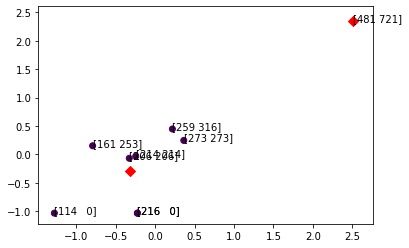

In [87]:
#creata visualization of k
xs = model_scaled[:,1]
ys = model_scaled[:,2]

x_real = model_array[:,1:3]
#fig, ax = plt.subplots()
for i, txt in enumerate(x_real):
    plt.annotate(txt, (xs[i], ys[i]))

plt.scatter(xs, ys, c=labels)
 
    
centroids = model_km.cluster_centers_
centroid_x = centroids[:,1]
centroid_y = centroids[:,2]
plt.scatter(centroid_x, centroid_y, marker = "D", s=50, c="Red")
plt.show()

In [88]:
#plot elbow method to analyze number of k optimum
def inertia_kmeans(i, samples):
    ks = range(1,i)
    inertias = []
    for k in ks:
        km = KMeans(n_clusters = k)
        km.fit(samples)
        inertias.append(km.inertia_)
    plt.plot(ks, inertias, "-o")
    plt.xlabel("number of clusters, k")
    plt.ylabel("inertia")
    plt.xticks(ks)
    plt.show()

C:\Users\iqbal\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  import sys


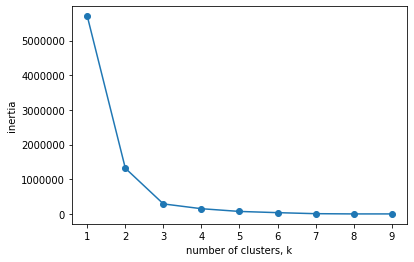

In [89]:
inertia_kmeans(10, model_array)

We can see that from elbow method, 2 number of K is optimum, matches our intuition of target class.

In [90]:
df_label = pd.DataFrame(labels)
df_label.columns = ['water_coning']
df_label['water_coning'] = df_label['water_coning'].replace([0,1], ['No', 'Yes'])

In [91]:
#show data with coning presence
print(model[df_label['water_coning']=='Yes'])

       Date  Gas Rate  Oil Rate  Water Rate
8  25-12-17       645       481         721


Intuitively, we can analyze this value matches our senses since the water production has been the major contribution of the water

In [92]:
df_label = pd.concat([model, df_label], axis = 1)
df_label.to_csv('prediction_water_coning.csv')
print(df_label)

       Date  Gas Rate  Oil Rate  Water Rate liquid_loading
0  18-02-17         0       114           0             No
1  22-02-17         0       216           0             No
2  01-04-17         0       216           0             No
3  01-06-17      1717       259         316             No
4  26-06-17      1948       161         253             No
5  01-07-17         0       214         214             No
6  09-07-17       825       273         273             No
7  11-07-17      1507       206         206             No
8  25-12-17       645       481         721            Yes
